<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h1>Task 2</h1>
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

In [8]:
# load dataset
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


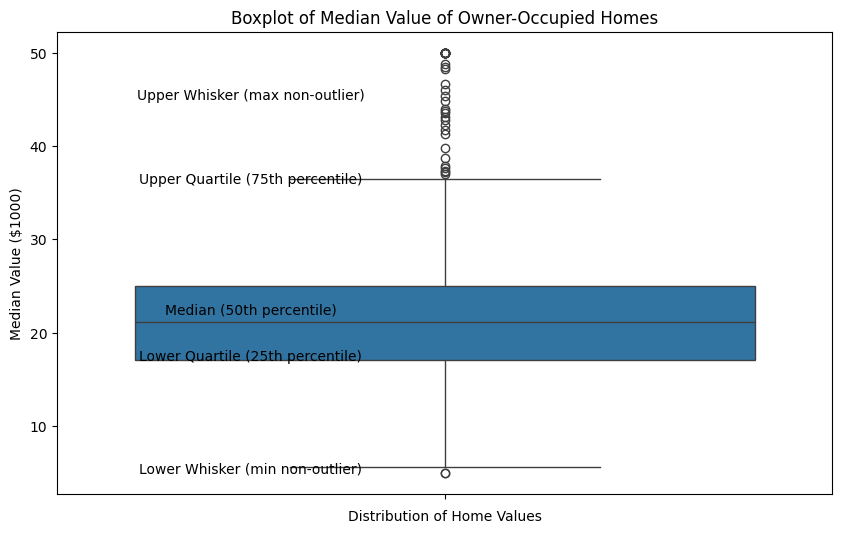

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000)')
plt.xlabel('Distribution of Home Values')
plt.text(-0.25, 45, 'Upper Whisker (max non-outlier)', horizontalalignment='center')
plt.text(-0.25, 36, 'Upper Quartile (75th percentile)', horizontalalignment='center')
plt.text(-0.25, 22, 'Median (50th percentile)', horizontalalignment='center')
plt.text(-0.25, 17, 'Lower Quartile (25th percentile)', horizontalalignment='center')
plt.text(-0.25, 5, 'Lower Whisker (min non-outlier)', horizontalalignment='center')
plt.show()

<Mark>Summary</Mark>

1. The median value of owner-occupied homes is approximately $22,000. This is the middle line within the box.
2. The box itself represents the interquartile range, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). This shows where the middle 50% of the data lies.
3. The whiskers extend to the smallest and largest values within 1.5 times the IQR from the quartiles. Data points beyond the whiskers are considered outliers.
4. The circles beyond the upper whisker indicate outliers in the data, which are homes with median values significantly higher than the majority of the data.

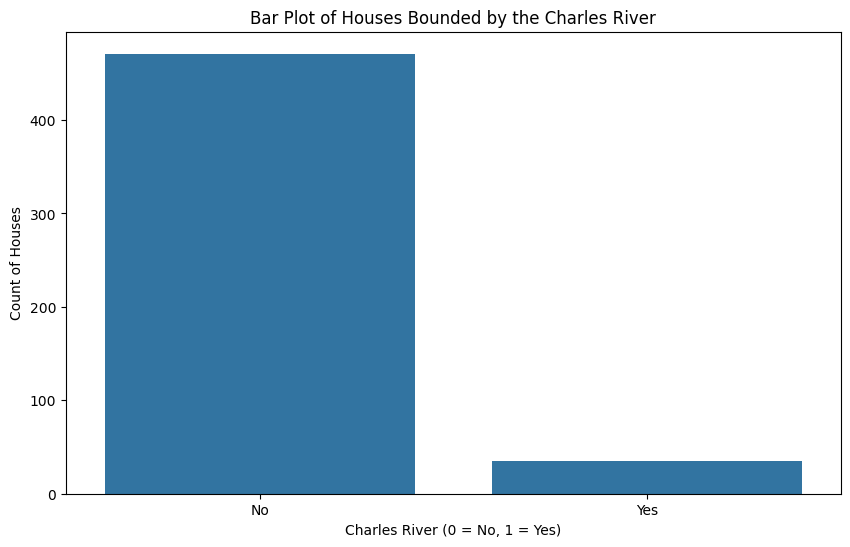

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Houses Bounded by the Charles River')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count of Houses')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

<Mark>Summary</Mark>
1. The plot clearly shows that the majority of houses in the dataset are not bounded by the Charles River.
2. This can be an important factor in housing decisions and pricing, as proximity to a river can be a desirable feature for some buyers.


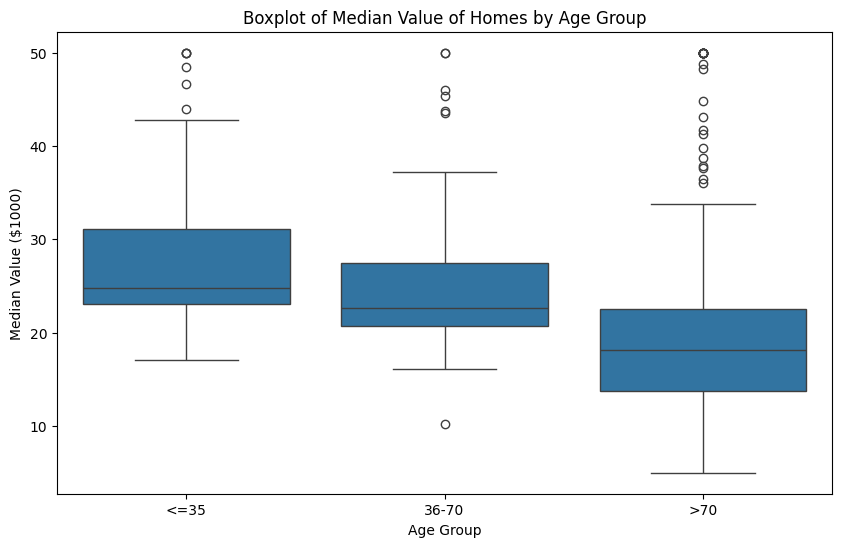

In [11]:
plt.figure(figsize=(10, 6))

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '>70'])

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000)')
plt.show()

<Mark>Summary</Mark>
1. The plot shows that newer homes (<=35 years) tend to have higher median values compared to older homes (>70 years).
2. The distribution of home values is wider for homes built between 36-70 years ago, as indicated by the larger IQR.
3. There are more outliers in the <=35 and 36-70 age groups, suggesting a presence of homes with significantly higher values in these categories.


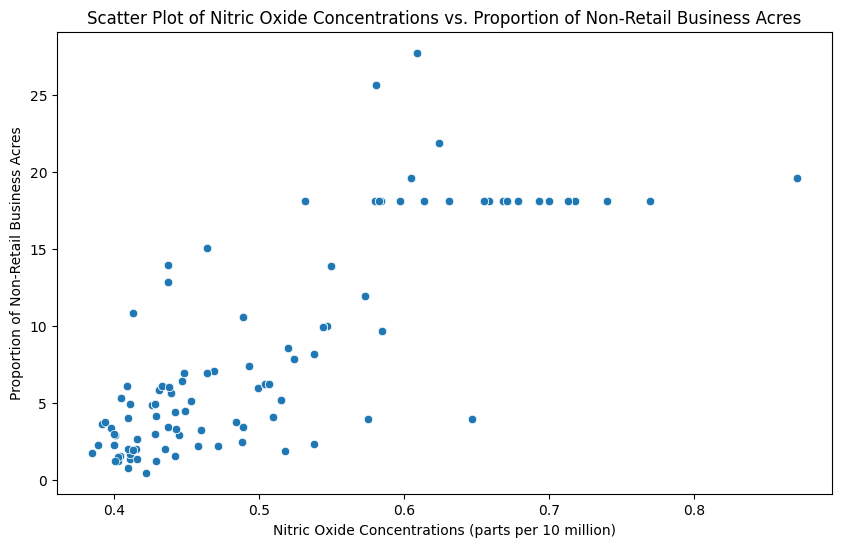

In [16]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

<Mark>Summary</Mark>
1. This scatter plot shows the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS) in different towns.
2. Axes:
	•	X-Axis: Represents the concentration of nitric oxide (NOX) in parts per 10 million.
	•	Y-Axis: Represents the proportion of non-retail business acres (INDUS) in each town.
3. The scatter plot indicates a positive relationship between NOX concentrations and the proportion of non-retail business acres.
4. As the concentration of nitric oxide increases, the proportion of non-retail business acres tends to increase as well.
5. There is a noticeable clustering of data points at lower NOX concentrations (around 0.4 to 0.5), with a wide spread in the proportion of non-retail business acres.
6. At higher NOX concentrations (above 0.5), the spread in the proportion of non-retail business acres becomes more uniform, with fewer data points.
7. The plot suggests that areas with higher industrial activity (higher proportion of non-retail business acres) tend to have higher concentrations of nitric oxide.
8. This can be useful for identifying areas with higher pollution levels and for planning interventions to reduce pollution.


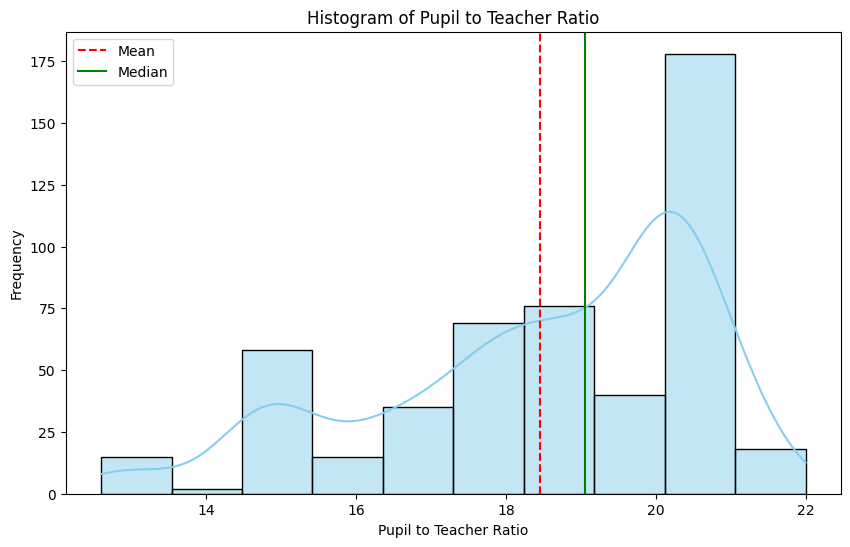

In [12]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.axvline(boston_df['PTRATIO'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(boston_df['PTRATIO'].median(), color='g', linestyle='-', label='Median')
plt.legend()
plt.show()

<Mark>Summary</Mark>
1. The histogram shows the frequency of different pupil-to-teacher ratios in the dataset.
2. The most common pupil-to-teacher ratio falls around 20, as indicated by the tallest bar in the histogram.
3. There is a noticeable drop in frequency for pupil-to-teacher ratios below 18 and above 20.
4. The distribution is slightly skewed to the left, indicating that there are more towns with higher pupil-to-teacher ratios.
5. The mean and median lines help in understanding the central tendency of the distribution.


**_________________________**
<h1>Task 3</h1>

For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

<Mark>**Question 1:Is there a significant difference in median value of houses bounded by the Charles river or not?**</Mark>

- Null Hypothesis (H_0): There is no significant difference in the median value of houses bounded by the Charles River.

- Alternative Hypothesis (H_a): There is a significant difference in the median value of houses bounded by the Charles River.

If the p-value is less than \alpha, we reject the null hypothesis, indicating a significant difference. If the p-value is greater than \alpha, we fail to reject the null hypothesis, indicating no significant difference.


In [14]:
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_val = scipy.stats.ttest_ind(chas_0, chas_1)

# Print the results
print(f"T-statistic is: {t_stat}, P-value is: {p_val}")

alpha = 0.05

if p_val < alpha:
    print("Reject H0: There is a significant difference in the median value of houses bounded by the Charles river.")
else:
    print("Fail to reject H0: There is no significant difference in the median value of houses bounded by the Charles river.")

T-statistic is: -3.996437466090509, P-value is: 7.390623170519905e-05
Reject H0: There is a significant difference in the median value of houses bounded by the Charles river.


<Mark>**Conclusion**</Mark>

P value is 7.390623170519905 \times 10^{-5} = 0.00007390623170519905 
Given the p-value is less than 0.05, we reject the null hypothesis. This indicates that there is a significant difference in the median value of houses bounded by the Charles River compared to those that are not.

<Mark>**Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940**</Mark>

- Null Hypothesis (H_0): There is no difference in the median values of houses for different proportions of owner-occupied units built prior to 1940.
- Alternative Hypothesis (H_a): There is a difference in the median values of houses for different proportions of owner-occupied units built prior to 1940.

Discretize the AGE Variable:
- Group 1: 35 years and younger
- Group 2: Between 36 and 70 years
- Group 3: 71 years and older


In [23]:
# Perform ANOVA
anova_model = ols('MEDV ~ C(AGE_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Print the results
print(anova_table)

# Conclusion
if anova_table['PR(>F)'][0] < alpha:
    print("Reject H0: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("Fail to reject H0: There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")

                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject H0: There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


<Mark>**Conclusion**</Mark>

ANOVA Test Results:

	•	Sum of Squares (C(AGE_Group)): 5401.731883
	•	Degrees of Freedom (C(AGE_Group)): 2.0
	•	F-statistic: 36.40765
	•	P-value (PR(>F)):  1.710501 \times 10^{-15} 

- Since the p-value ( 1.710501 \times 10^{-15} ) is significantly less than the alpha level of 0.05, we reject the null hypothesis.

- There is a significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.


<Mark>**Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?**</Mark>

- Null Hypothesis (H_0): There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
- Alternative Hypothesis (H_a): There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [17]:
# Perform Pearson Correlation
correlation, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print(f"Correlation coefficient: {correlation}, P-value: {p_val}")

# Conclusion
if p_val < alpha:
    print("Reject H0: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject H0: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Correlation coefficient: 0.7636514469209192, P-value: 7.913361061210442e-98
Reject H0: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


<Mark>**Conclusion**</Mark>

Pearson Correlation Test Results:

- **Correlation coefficient:** 0.7636514469209192
- **P-value:**  7.913361061210442 \times 10^{-98} 

Since the p-value ( 7.913361061210442 \times 10^{-98} ) is significantly less than the alpha level of 0.05, we reject the null hypothesis.

There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


<Mark>**Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**</Mark>

- Null Hypothesis (H_0): The weighted distance to the five Boston employment centers has no impact on the median value of owner-occupied homes.
- Alternative Hypothesis (H_a): The weighted distance to the five Boston employment centers has an impact on the median value of owner-occupied homes.

In [25]:
# Perform regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())

# Conclusion
if model.pvalues['DIS'] < alpha:
    print("Reject H0: There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Fail to reject H0: There is no significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:25:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<Mark>**Conclusion**</Mark>

**Regression Analysis Results:**

- Dependent Variable (Dep. Variable): MEDV (Median value of owner-occupied homes)
- R-squared: 0.062
- Adjusted R-squared (Adj. R-squared): 0.061
- F-statistic: 33.58
- Prob (F-statistic): 1.21e-08
- No. Observations: 506
- Df Residuals: 504
- Df Model: 1
- Covariance Type: nonrobust

**Coefficients:**

- Intercept (const): 18.3901
- Standard Error: 0.817
- t-statistic: 22.499
- P-value: 0.000
- Confidence Interval (0.025 - 0.975): 16.784 - 19.996
- DIS (Distance to Employment Centers): 1.0916
- Standard Error: 0.188
- t-statistic: 5.795
- P-value: 0.000
- Confidence Interval (0.025 - 0.975): 0.722 - 1.462

Since the p-value for the DIS coefficient is significantly less than the alpha level of 0.05, we reject the null hypothesis.

<Mark>**Conclusion Summary:**</Mark>

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) <mark>**Answer**:There is a significant difference in the median value of houses bounded by the Charles river.</mark>
3. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)<mark>**Answer**:There is a significant difference.</mark>
4. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)<mark>**Answer**:No, it's incorrect. There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.</mark>
5. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)<mark>**Answer**:There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes. As the weighted distance increases, the median value of homes tends to increase, which might indicate that homes further from the employment centres have higher values, possibly due to being in more desirable suburban or rural locations.</mark>

